In [1]:
# Standard Libraries
import shutil
import urllib.request as urlrequest
from collections import Counter
from pathlib import Path
from pprint import pprint
from zipfile import ZipFile
import zipfile
from datetime import datetime
import datetime
import ast
import json
# 3rd-party Libraries
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.offline as pyo
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [2]:
def read_file(file_path):
    if file_path.endswith('.zip'):
        with zipfile.ZipFile(file_path, 'r') as zfile:
            tsv_files = [f for f in zfile.namelist() if f.endswith('.tsv')]
            if len(tsv_files) == 0:
                raise ValueError("No TSV files found in the zip file.")
            elif len(tsv_files) > 1:
                raise ValueError("Zip file must contain exactly one TSV file.")

            with zfile.open(tsv_files[0]) as file:
                df = pd.read_csv(file, sep='\t')
    elif file_path.endswith('.tsv'):
        df = pd.read_csv(file_path, sep='\t')
    else:
        raise ValueError("Unsupported file format. Only .zip and .tsv files are supported.")

    return df


file_path = 'JOURNALISM_20230401_to_20230425_7e4c492_session-features.zip'  # Replace with your file path
raw_data = read_file(file_path)

In [3]:
df_session = raw_data.dropna()
for col in df_session.columns:
    dtype = df_session[col].dtype
    if dtype == bool:
        # convert the boolean column to integer (1 for True and 0 for False)
        df_session[col] = df_session[col].astype(int)

def convert_to_seconds(time_str):
    try:
        time_obj = datetime.datetime.strptime(time_str, '%H:%M:%S.%f').time()
        timedelta_obj = datetime.timedelta(hours=time_obj.hour, minutes=time_obj.minute, seconds=time_obj.second, microseconds=time_obj.microsecond)
        return timedelta_obj.total_seconds()
    except ValueError:
        return None

df_session['PlayTime'] = df_session['PlayTime'].apply(convert_to_seconds)

df_session['PlayTime-Total Time'] = df_session['PlayTime-Total Time'].apply(convert_to_seconds)
df_session['PlayTime-Idle Time'] = df_session['PlayTime-Idle Time'].apply(convert_to_seconds)

<ipython-input-3-bbf382693c4e>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-3-bbf382693c4e>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-3-bbf382693c4e>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-3-bbf382693

BetweenLevels     6
OnFail           30
Other            62
Name: QuitType, dtype: int64
BetweenLevels    1
OnFail           2
Other            4
Name: QuitType, dtype: int64
BetweenLevels     0
OnFail            6
Other            19
Name: QuitType, dtype: int64
BetweenLevels    0
OnFail           0
Other            2
Name: QuitType, dtype: int64
BetweenLevels    0
OnFail           5
Other            7
Name: QuitType, dtype: int64


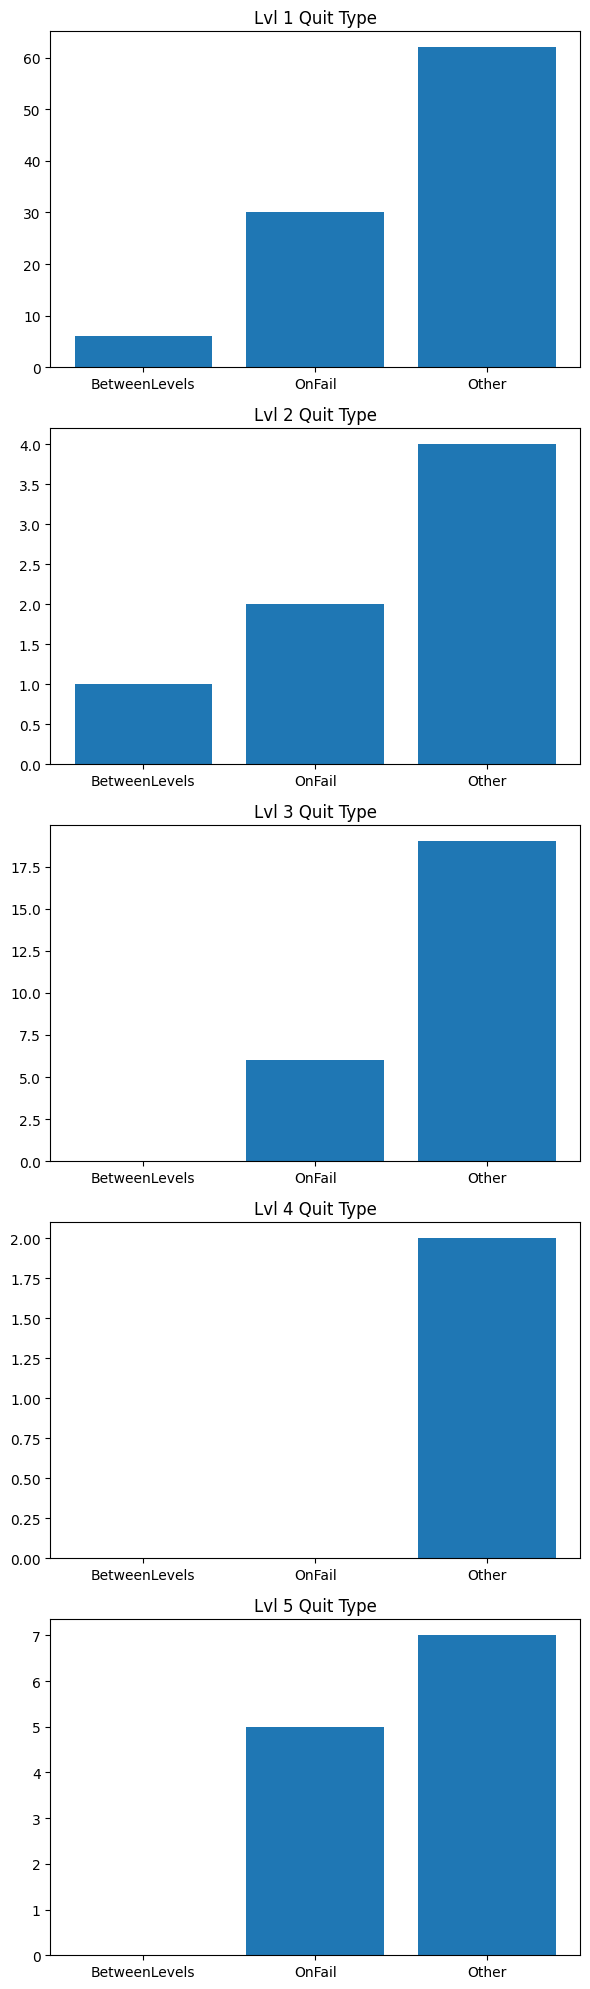

In [4]:
quit_types = sorted(df_session['QuitType'].unique())
fig, axs = plt.subplots(5, 1, figsize=(6, 20))

bins = 3
x_ticks = np.arange(len(quit_types))
x_tick_labels = quit_types

for i, ax in enumerate(axs):
    fail_level = i + 1
    fail_data = df_session[df_session[f'lvl{fail_level}_FailureCount'] > 0]
    df_column = fail_data['QuitType']
    quit_type_counts = df_column.value_counts().reindex(quit_types, fill_value=0)
    print(quit_type_counts)
    ax.bar(x_ticks, quit_type_counts, align='center')
    ax.set_title(f"Lvl {fail_level} Quit Type")

    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_tick_labels)

fig.tight_layout()
plt.show()




In [5]:
df_session[df_session['lvl4_FailureCount'] > 0]

,PlayerID,SessionID,PlayTime,PlayTime-Total Time,PlayTime-Idle Time,PlayerAttributes,QuitLevel,QuitLevel-EventName,QuitLevel-NodeID,QuitType,QuitType-BetweenLevels,QuitType-OnFail,QuitType-OnCheckpoint,QuitType-Other,SkillSequenceCount,SkillSequenceCount-Event Sequence,TopAttribute,TopAttribute-Names,TotalFails,WorstAttribute,WorstAttribute-Names,lvl1_AttributeView,lvl2_AttributeView,lvl3_AttributeView,lvl4_AttributeView,lvl5_AttributeView,lvl1_EditorNoteOpen,lvl2_EditorNoteOpen,lvl3_EditorNoteOpen,lvl4_EditorNoteOpen,lvl5_EditorNoteOpen,lvl1_FailureCount,lvl1_FailureCount-OutOfTime,lvl1_FailureCount-LowAttribute,lvl2_FailureCount,lvl2_FailureCount-OutOfTime,lvl2_FailureCount-LowAttribute,lvl3_FailureCount,lvl3_FailureCount-OutOfTime,lvl3_FailureCount-LowAttribute,lvl4_FailureCount,lvl4_FailureCount-OutOfTime,lvl4_FailureCount-LowAttribute,lvl5_FailureCount,lvl5_FailureCount-OutOfTime,lvl5_FailureCount-LowAttribute,lvl1_LevelCompleted,lvl2_LevelCompleted,lvl3_LevelCompleted,lvl4_LevelCompleted,lvl5_LevelCompleted,lvl1_LevelStoryAlignment,lvl2_LevelStoryAlignment,lvl3_LevelStoryAlignment,lvl4_LevelStoryAlignment,lvl5_LevelStoryAlignment,ContinuesOnFail,GameComplete
241,FoldedHall,23040610425433820,714.322,714.322,NaN,"[2,4,3,3,3,0]",3,story_click,none,Other,0,0,0,1,840,"[{""skill"": ""{\""Research\"":1,\""Resourceful\"":0,...",4,['resourceful'],138,0,['research'],0,0,0,0,0,0,0,0,0,0,61,40,21,0,0,0,53,0,53,5,0,5,19,0,19,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,138,1
250,ChattingGem,23040615271867036,778.927,1573.562,794.635,"[2,4,5,2,3,5]",5,story_click,none,Other,0,0,0,1,885,"[{""skill"": ""{\""Research\"":0,\""Resourceful\"":1,...",5,"['tech', 'research']",198,2,"['endurance', 'social']",0,0,0,0,0,0,0,0,0,0,97,60,37,1,0,1,76,0,76,3,0,3,21,0,21,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,198,1


In [6]:
#people with less than 3 fails
fail_count = 3
condition = (df_session['lvl1_FailureCount-LowAttribute'] < fail_count) | (df_session['lvl2_FailureCount-LowAttribute'] < fail_count) | (df_session['lvl3_FailureCount-LowAttribute'] < fail_count) | (df_session['lvl4_FailureCount-LowAttribute'] < fail_count) | (df_session['lvl5_FailureCount-LowAttribute'] < fail_count)
filtered_df = df_session.loc[condition]
#people that completed the game
df_completed = df_session[df_session['GameComplete'] == 1]
#people with less than 3 fails
condition = (df_session['lvl1_FailureCount-LowAttribute'] >= fail_count) | (df_session['lvl2_FailureCount-LowAttribute'] >= fail_count) | (df_session['lvl3_FailureCount-LowAttribute'] >= fail_count) | (df_session['lvl4_FailureCount-LowAttribute'] >= fail_count) | (df_session['lvl5_FailureCount-LowAttribute'] >= fail_count)
filtered_df_more_than_3 = df_session.loc[condition]


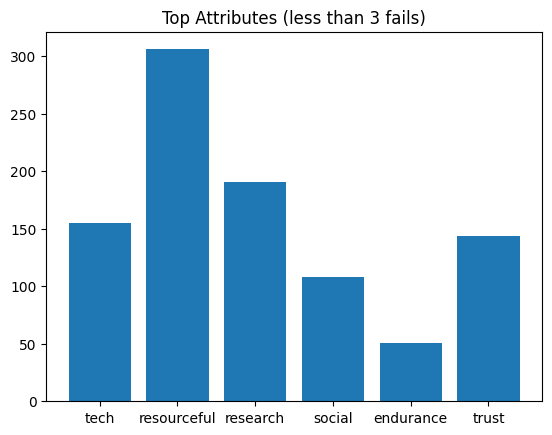

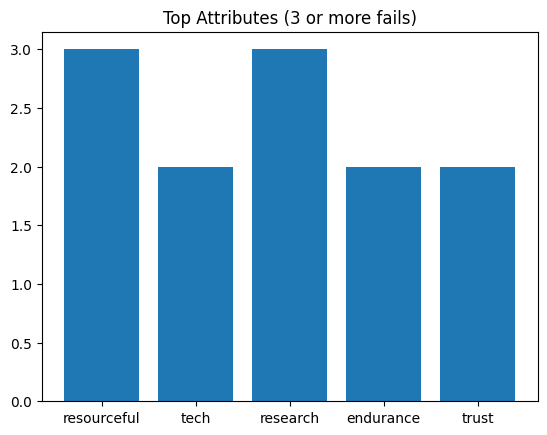

In [7]:
top_counts = {}
for group in filtered_df['TopAttribute-Names']:
    group = ast.literal_eval(group)
    for value in group:
        if value in top_counts:
            top_counts[value] += 1
        else:
            top_counts[value] = 1
plt.bar(top_counts.keys(), top_counts.values())
plt.title("Top Attributes (less than 3 fails)")
plt.show()

top_counts = {}
for group in filtered_df_more_than_3['TopAttribute-Names']:
    group = ast.literal_eval(group)
    for value in group:
        if value in top_counts:
            top_counts[value] += 1
        else:
            top_counts[value] = 1
plt.bar(top_counts.keys(), top_counts.values())
plt.title("Top Attributes (3 or more fails)")
plt.show()

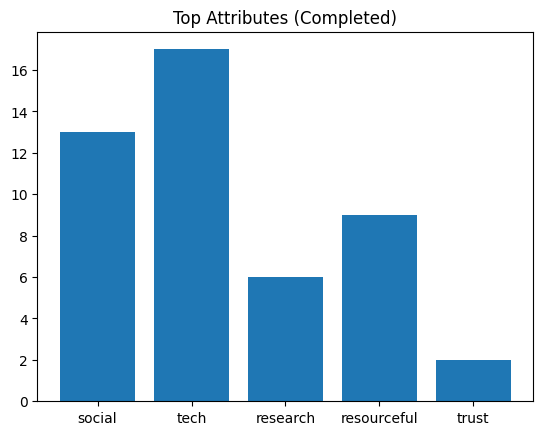

In [8]:
top_counts_completed = {}
for group in df_completed['TopAttribute-Names']:
    group = ast.literal_eval(group)
    for value in group:
        if value in top_counts_completed:
            top_counts_completed[value] += 1
        else:
            top_counts_completed[value] = 1
plt.bar(top_counts_completed.keys(), top_counts_completed.values())
plt.title("Top Attributes (Completed)")
plt.show()

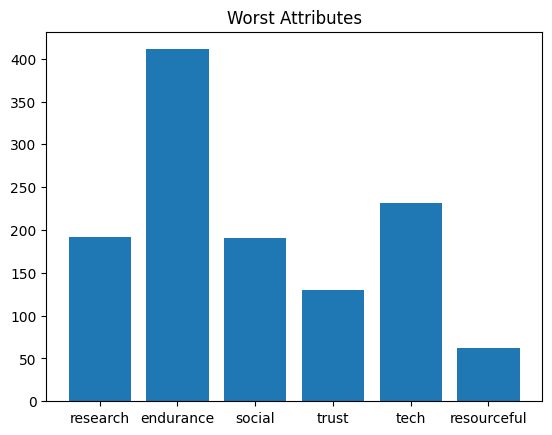

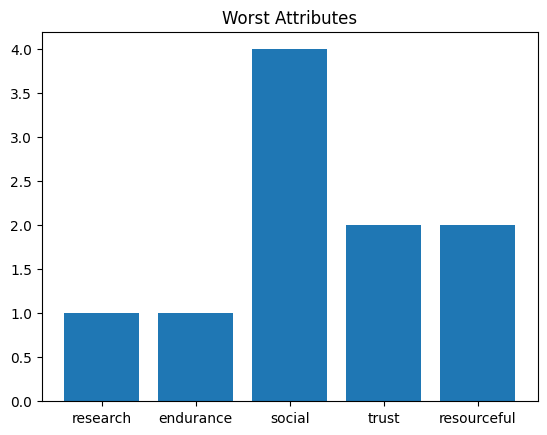

In [9]:
worst_counts = {}
for group_1 in filtered_df['WorstAttribute-Names']:
    group_1 = ast.literal_eval(group_1)
    for value in group_1:
        if value in worst_counts:
            worst_counts[value] += 1
        else:
            worst_counts[value] = 1
plt.bar(worst_counts.keys(), worst_counts.values())
plt.title("Worst Attributes")
plt.show()

worst_counts = {}
for group_1 in filtered_df_more_than_3['WorstAttribute-Names']:
    group_1 = ast.literal_eval(group_1)
    for value in group_1:
        if value in worst_counts:
            worst_counts[value] += 1
        else:
            worst_counts[value] = 1
plt.bar(worst_counts.keys(), worst_counts.values())
plt.title("Worst Attributes")
plt.show()

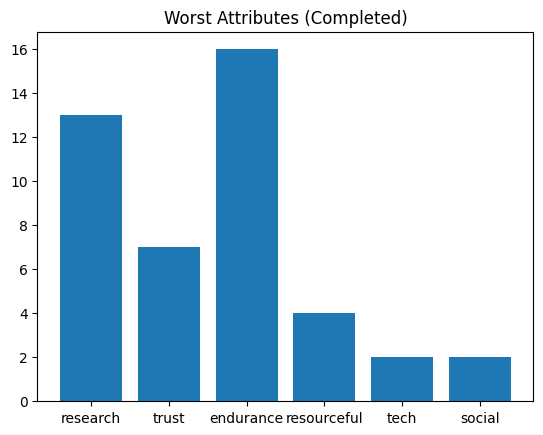

In [10]:
worst_counts_completed = {}
for group_1 in df_completed['WorstAttribute-Names']:
    group_1 = ast.literal_eval(group_1)
    for value in group_1:
        if value in worst_counts_completed:
            worst_counts_completed[value] += 1
        else:
            worst_counts_completed[value] = 1
plt.bar(worst_counts_completed.keys(), worst_counts_completed.values())
plt.title("Worst Attributes (Completed)")
plt.show()

In [11]:
json_str = df_session['SkillSequenceCount-Event Sequence']
parsed_json_objects = []
for string in json_str:
    parsed_json = json.loads(string)
    parsed_json_objects.append(parsed_json)

last_attributes = []
for attr in parsed_json_objects:
  if len(attr) > 0:
    last = attr[-1]
    last_attributes.append(last)

skills = [json.loads(item['skill']) for item in last_attributes]
num_dictionaries = len(skills)
sum_dict = {}
for dictionary in skills:
    for key, value in dictionary.items():
        if key in sum_dict:
            sum_dict[key] += value
        else:
            sum_dict[key] = value
average_dict = {key: value / num_dictionaries for key, value in sum_dict.items()}

labels = list(average_dict.keys())
values = list(average_dict.values())
categories = [*labels, labels[0]]
values = [*values, values[0]]

fig = go.Figure(
    data=[
        go.Scatterpolar(r=values, theta=categories, name='Average Score'),
      ],
    layout=go.Layout(
        title=go.layout.Title(text='Attribute Comparison (last JSON instance)'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

fig

In [12]:
json_str = df_completed['SkillSequenceCount-Event Sequence']
parsed_json_objects = []
for string in json_str:
    parsed_json = json.loads(string)
    parsed_json_objects.append(parsed_json)

last_attributes = []
for attr in parsed_json_objects:
  if len(attr) > 0:
    last = attr[-1]
    last_attributes.append(last)


In [13]:
skills = [json.loads(item['skill']) for item in last_attributes]
num_dictionaries = len(skills)
sum_dict = {}
for dictionary in skills:
    for key, value in dictionary.items():
        if key in sum_dict:
            sum_dict[key] += value
        else:
            sum_dict[key] = value
average_dict = {key: value / num_dictionaries for key, value in sum_dict.items()}

In [14]:
labels = list(average_dict.keys())
values = list(average_dict.values())
categories = [*labels, labels[0]]
values = [*values, values[0]]

fig = go.Figure(
    data=[
        go.Scatterpolar(r=values, theta=categories, name='Average Score'),
      ],
    layout=go.Layout(
        title=go.layout.Title(text='Attribute Comparison for Completed Games (last JSON instance)'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

fig

In [15]:
threshold = 10
condition = df_session['lvl1_FailureCount-LowAttribute'] < threshold

df_failure = df_session[condition]


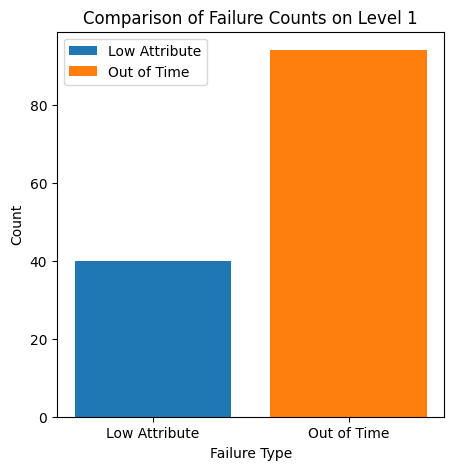

In [16]:
def bar_graph(df_1, df_2, level):
  plt.figure(figsize=(5, 5))
  plt.bar('Low Attribute', df_1.sum(), label='Low Attribute')
  plt.bar('Out of Time', df_2.sum(), label='Out of Time')
  plt.xlabel('Failure Type')
  plt.ylabel('Count')
  plt.title(f'Comparison of Failure Counts on Level {level}')
  plt.legend()

  plt.show()

bar_graph(df_failure['lvl1_FailureCount-LowAttribute'], df_failure['lvl1_FailureCount-OutOfTime'], 1)

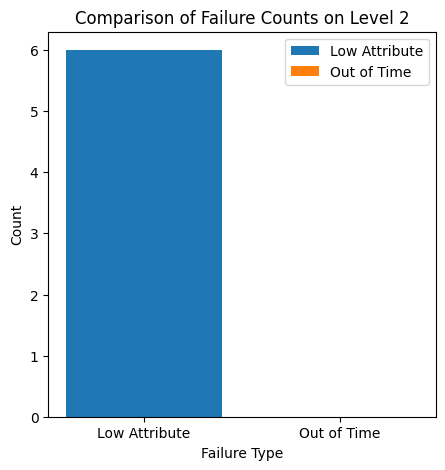

In [17]:
bar_graph(df_failure['lvl2_FailureCount-LowAttribute'], df_failure['lvl2_FailureCount-OutOfTime'], 2)

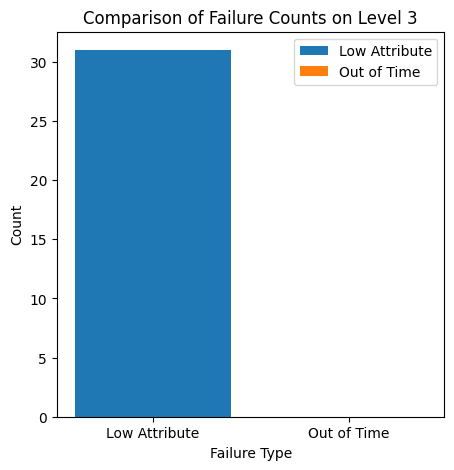

In [18]:
bar_graph(df_failure['lvl3_FailureCount-LowAttribute'], df_failure['lvl3_FailureCount-OutOfTime'], 3)

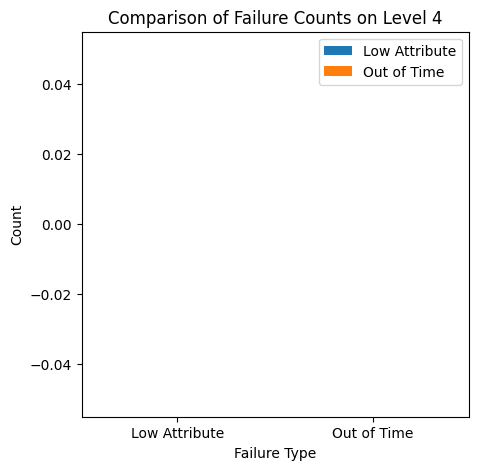

In [19]:
bar_graph(df_failure['lvl4_FailureCount-LowAttribute'], df_failure['lvl4_FailureCount-OutOfTime'], 4)

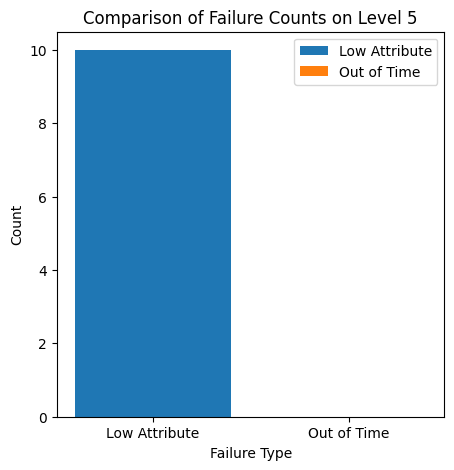

In [20]:
bar_graph(df_failure['lvl5_FailureCount-LowAttribute'], df_failure['lvl5_FailureCount-OutOfTime'], 5)

396 out of 499 players had only one session


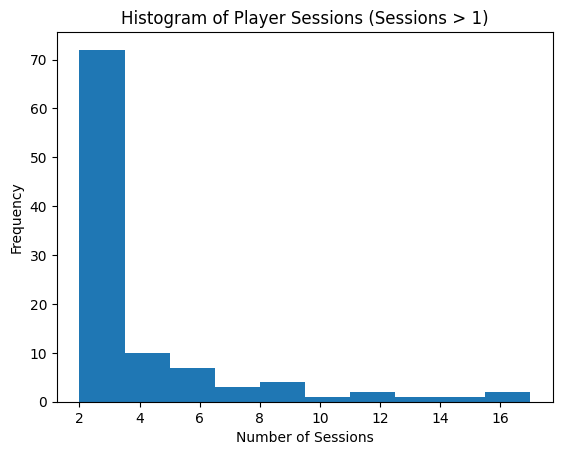

In [22]:
player_id_df = df_session.groupby('PlayerID').size()

player_id_df_filtered = player_id_df[player_id_df > 1]
equal_one = player_id_df[player_id_df == 1]
print(f'{len(equal_one)} out of {len(player_id_df)} players had only one session')

plt.hist(player_id_df_filtered)
plt.xlabel('Number of Sessions')
plt.ylabel('Frequency')
plt.title('Histogram of Player Sessions (Sessions > 1)')
plt.show()

In [23]:
average_player_time = df_session.groupby('PlayerID')['PlayTime'].mean()
# greater than 300 seconds (5 minutes)
average_player_time = average_player_time[average_player_time > 300]

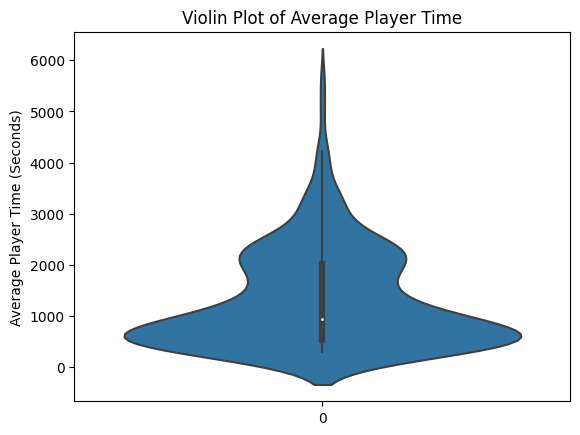

Average time: 21.779532256308734 minutes


In [24]:
sns.violinplot(data=average_player_time)
plt.ylabel('Average Player Time (Seconds)')
plt.title('Violin Plot of Average Player Time')
plt.show()
print(f'Average time: {average_player_time.mean() / 60} minutes'  )

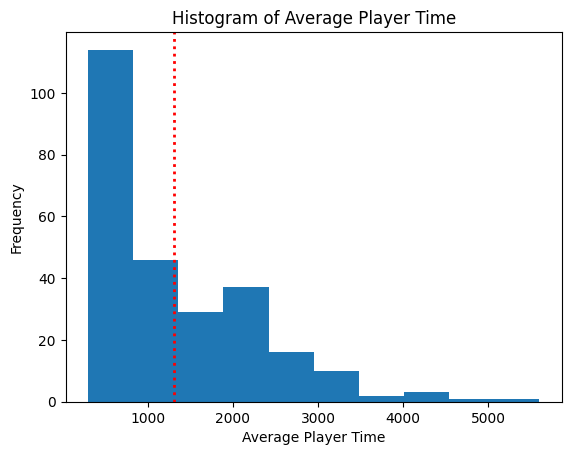

Average time: 21.779532256308734 minutes


In [25]:
plt.hist(average_player_time, bins=10)
plt.axvline(x=average_player_time.mean(), color='red', linestyle='dotted', linewidth=2)
plt.xlabel('Average Player Time')
plt.ylabel('Frequency')
plt.title('Histogram of Average Player Time')
plt.show()
print(f'Average time: {average_player_time.mean() / 60} minutes'  )

In [26]:
df_completed = df_completed[df_completed['TotalFails'] < 50 ]
json_str = df_completed['SkillSequenceCount-Event Sequence']
parsed_json_objects = []
for string in json_str:
    parsed_json = json.loads(string)
    parsed_json_objects.append(parsed_json)

last_attributes = []
for attr in parsed_json_objects:
  if len(attr) > 0:
    last = attr
    last_attributes.append(last)

In [27]:
for sublist in parsed_json_objects:
    total_skill = {
        "Research": 0,
        "Resourceful": 0,
        "Endurance": 0,
        "Tech": 0,
        "Social": 0,
        "Trust": 0
    }
    for obj in sublist:
        skill_json = json.loads(obj["skill"])
        for key, value in skill_json.items():
            total_skill[key] += value

    print(total_skill)
    print("--------------------")

{'Research': 0, 'Resourceful': 1, 'Endurance': 5, 'Tech': 5, 'Social': 0, 'Trust': -1}
--------------------
{'Research': 2, 'Resourceful': 4, 'Endurance': 5, 'Tech': 4, 'Social': 1, 'Trust': 5}
--------------------
{'Research': 0, 'Resourceful': 2, 'Endurance': 5, 'Tech': 5, 'Social': 2, 'Trust': -1}
--------------------
{'Research': 1, 'Resourceful': 6, 'Endurance': 3, 'Tech': 4, 'Social': 2, 'Trust': 0}
--------------------
{'Research': 0, 'Resourceful': 3, 'Endurance': 5, 'Tech': 1, 'Social': 1, 'Trust': -1}
--------------------
{'Research': 0, 'Resourceful': 6, 'Endurance': 5, 'Tech': 4, 'Social': 2, 'Trust': 1}
--------------------
{'Research': 3, 'Resourceful': 2, 'Endurance': 3, 'Tech': 7, 'Social': 2, 'Trust': 4}
--------------------
{'Research': 1, 'Resourceful': 4, 'Endurance': 3, 'Tech': 1, 'Social': 2, 'Trust': 2}
--------------------
{'Research': 3, 'Resourceful': 2, 'Endurance': 4, 'Tech': 1, 'Social': 3, 'Trust': 1}
--------------------
{'Research': 0, 'Resourceful': 3, 

In [28]:
total_skill = {
    "Research": 0,
    "Resourceful": 0,
    "Endurance": 0,
    "Tech": 0,
    "Social": 0,
    "Trust": 0
}

num_items = 0
for sublist in parsed_json_objects:
    for obj in sublist:
        skill_json = json.loads(obj["skill"])
        for key, value in skill_json.items():
            total_skill[key] += value
    num_items += 1

average_scores = {key: value / num_items for key, value in total_skill.items()}

labels = list(average_scores.keys())
values = list(average_scores.values())
categories = [*labels, labels[0]]
values = [*values, values[0]]

fig = go.Figure(
    data=[
        go.Scatterpolar(r=values, theta=categories, name='Average Score'),
      ],
    layout=go.Layout(
        title=go.layout.Title(text='Attribute Comparison for Completed Games'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

print(average_scores)
fig

{'Research': 1.1333333333333333, 'Resourceful': 3.0, 'Endurance': 4.3, 'Tech': 3.8, 'Social': 1.7, 'Trust': 2.1}


In [29]:
df_lvl1 = df_session[df_session['lvl1_LevelCompleted'] == 1]
df_lvl2 = df_session[df_session['lvl2_LevelCompleted'] == 1]
df_lvl3 = df_session[df_session['lvl3_LevelCompleted'] == 1]
df_lvl4 = df_session[df_session['lvl4_LevelCompleted'] == 1]
df_lvl5 = df_session[df_session['lvl5_LevelCompleted'] == 1]

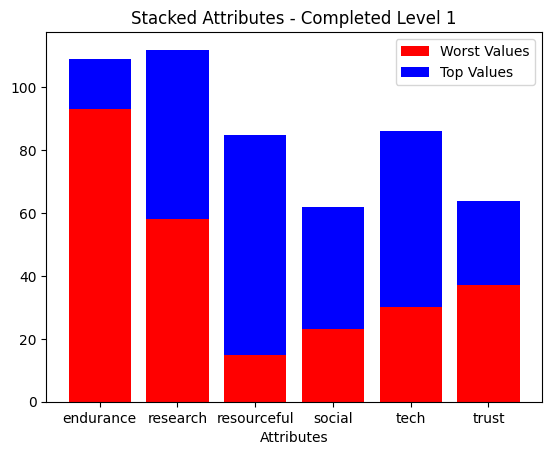

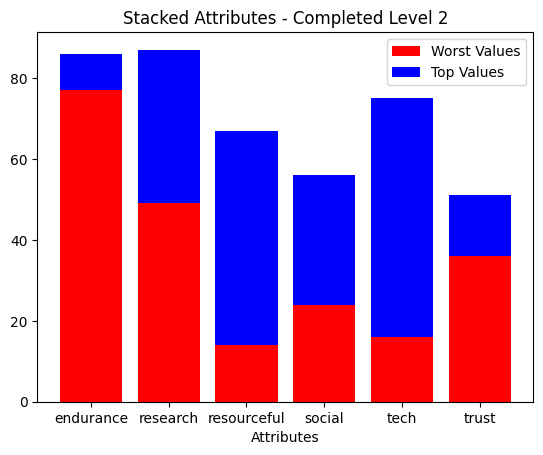

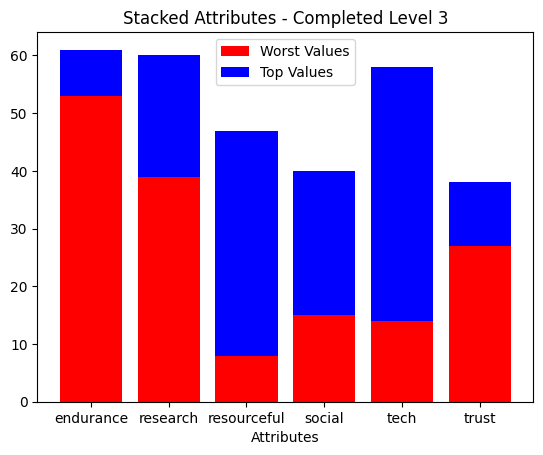

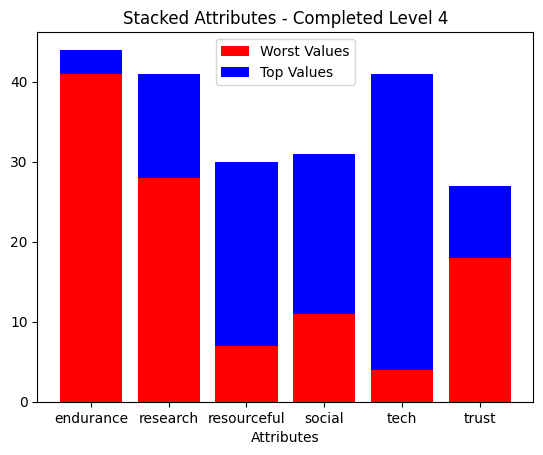

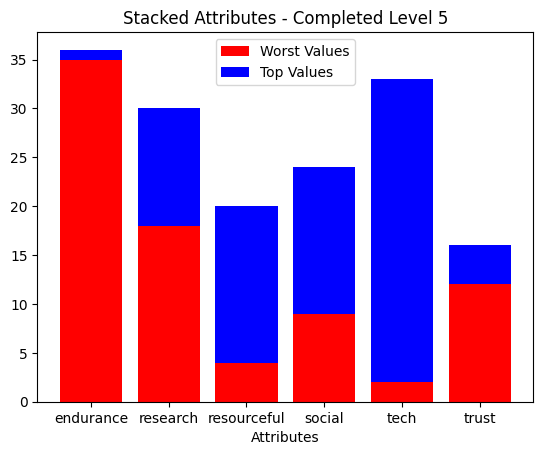

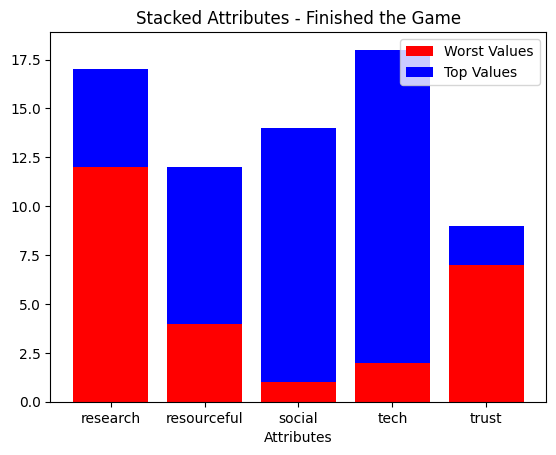

In [30]:
def calculate_counts(data_frame, attribute_column):
    attribute_counts = {}
    for group in data_frame[attribute_column]:
        group = ast.literal_eval(group)
        for value in group:
            if value in attribute_counts:
                attribute_counts[value] += 1
            else:
                attribute_counts[value] = 1
    return attribute_counts

data_frames = {
    "Completed Level 1": df_lvl1,
    "Completed Level 2": df_lvl2,
    "Completed Level 3": df_lvl3,
    "Completed Level 4": df_lvl4,
    "Completed Level 5": df_lvl5,
    "Finished the Game": df_completed
}

for name, data_frame in data_frames.items():
    top_counts = calculate_counts(data_frame, "TopAttribute-Names")
    worst_counts = calculate_counts(data_frame, "WorstAttribute-Names")

    sorted_keys = sorted(top_counts.keys())
    sorted_dict1 = {key: top_counts[key] for key in sorted_keys}
    sorted_dict2 = {key: worst_counts[key] for key in sorted_keys}
    x_label = sorted_dict1.keys()
    worst_values = list(sorted_dict2.values())
    top_values = list(sorted_dict1.values())

    plt.figure()
    plt.bar(x_label, worst_values, color='r', label='Worst Values')
    plt.bar(x_label, top_values, bottom=worst_values, color='b', label='Top Values')

    plt.xlabel('Attributes')
    plt.title('Stacked Attributes - ' + name)
    plt.legend()



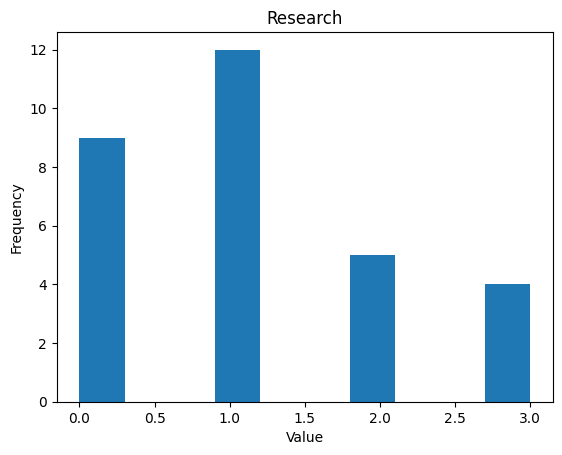

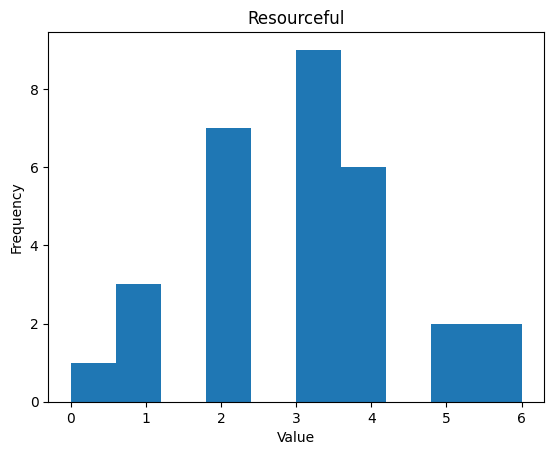

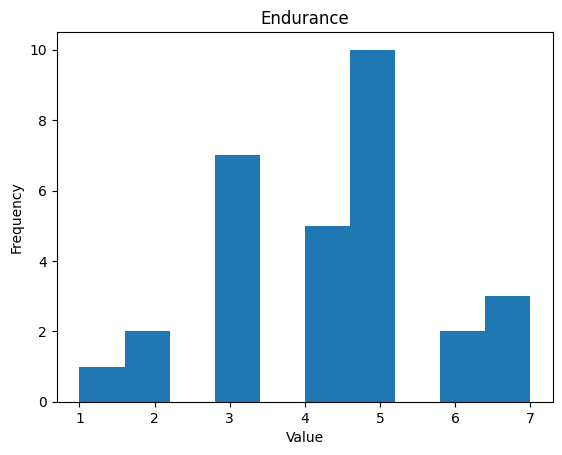

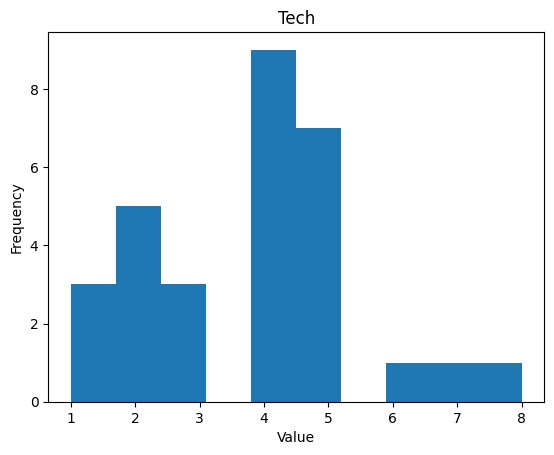

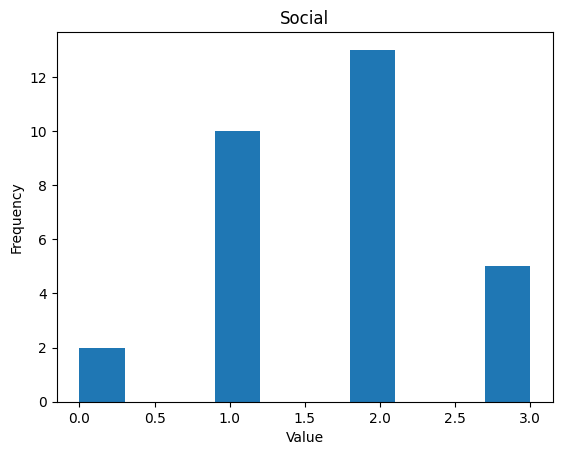

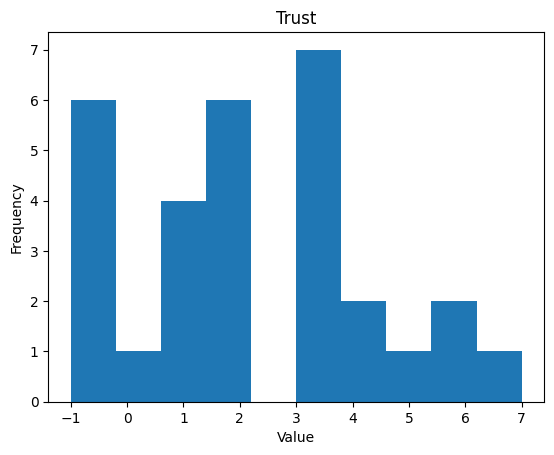

In [31]:
attributes = ["Research", "Resourceful", "Endurance", "Tech", "Social", "Trust"]
final_values = []

for sublist in parsed_json_objects:
    total_skill = {
        "Research": 0,
        "Resourceful": 0,
        "Endurance": 0,
        "Tech": 0,
        "Social": 0,
        "Trust": 0
    }
    for obj in sublist:
        skill_json = json.loads(obj["skill"])
        for key, value in skill_json.items():
            total_skill[key] += value

    final_values.append(list(total_skill.values()))

for i, attribute in enumerate(attributes):
    plt.figure(i)
    plt.hist([values[i] for values in final_values])
    plt.title(attribute)
    plt.xlabel("Value")
    plt.ylabel("Frequency")

plt.show()

In [32]:
parsed_json_objects

[[{'skill': '{"Research":0,"Resourceful":0,"Endurance":0,"Tech":2,"Social":0,"Trust":-1}',
   'time': '2023-04-02 20:52:24',
   'index': 0},
  {'skill': '{"Research":0,"Resourceful":0,"Endurance":0,"Tech":0,"Social":1,"Trust":0}',
   'time': '2023-04-02 20:57:45',
   'index': 1},
  {'skill': '{"Research":0,"Resourceful":0,"Endurance":0,"Tech":0,"Social":0,"Trust":1}',
   'time': '2023-04-02 20:58:10',
   'index': 2},
  {'skill': '{"Research":0,"Resourceful":0,"Endurance":1,"Tech":0,"Social":0,"Trust":0}',
   'time': '2023-04-02 20:59:54',
   'index': 3},
  {'skill': '{"Research":0,"Resourceful":0,"Endurance":1,"Tech":0,"Social":0,"Trust":0}',
   'time': '2023-04-02 21:00:09',
   'index': 4},
  {'skill': '{"Research":0,"Resourceful":0,"Endurance":0,"Tech":0,"Social":0,"Trust":1}',
   'time': '2023-04-02 21:00:32',
   'index': 5},
  {'skill': '{"Research":0,"Resourceful":0,"Endurance":1,"Tech":0,"Social":0,"Trust":0}',
   'time': '2023-04-02 21:03:13',
   'index': 6},
  {'skill': '{"Rese